In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import pandas as pd
from tqdm import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torchvision

C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\Devi B\Desktop\dataset


In [3]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [4]:


def load_images(image_paths):
    images = []
    for img_path in tqdm(image_paths):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(img)
            images.append(img)
        else:
            print(f"Warning: Unable to read image {img_path}")
    return images


In [5]:
def create_image_dataframe(base_dir):
    data = []
    for label, subdir in [("Ramya", os.path.join(base_dir, "Ramya")), ("Devi", os.path.join(base_dir, "Devi"))]:
        for image_path in glob(os.path.join(subdir, "*.jpeg")):
            data.append({"image_path": image_path, "label": label})
    df = pd.DataFrame(data)
    return df

In [6]:
base_dir = os.path.join(r"C:\\Users\\Devi B\\Desktop\\dataset")
data = create_image_dataframe(base_dir)

In [7]:
data.head()


,image_path,label
0,C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...,Ramya
1,C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...,Ramya
2,C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...,Ramya
3,C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...,Ramya
4,C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...,Ramya


In [8]:
data['label'].value_counts()

label
Devi     89
Ramya    85
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  174 non-null    object
 1   label       174 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


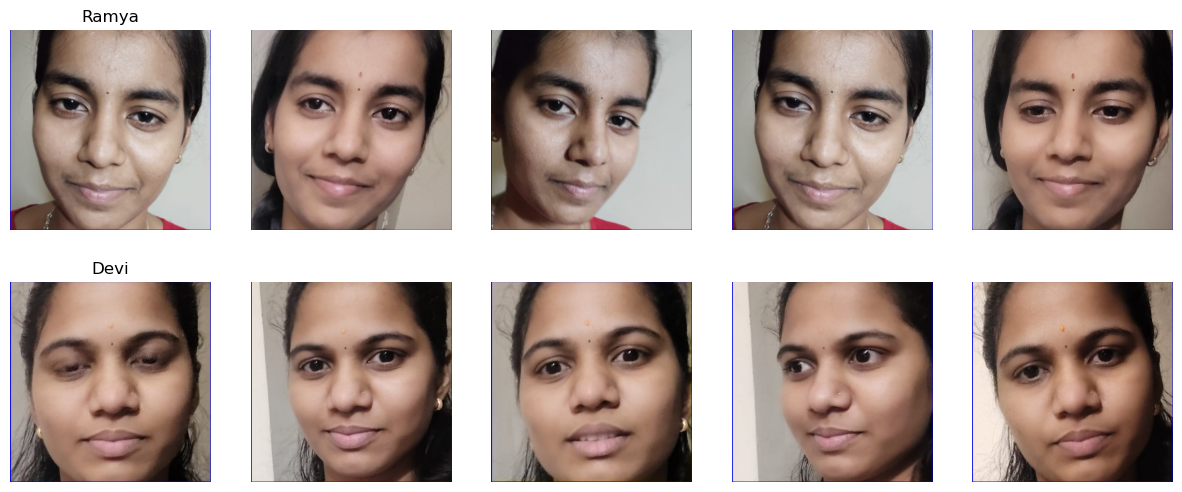

In [10]:
def show_examples(df, num_examples=5):
    fig, axs = plt.subplots(2, num_examples, figsize=(15, 6))
    classes = df['label'].unique()
    for i, label in enumerate(classes):
        examples = df[df['label'] == label].sample(num_examples)
        for j, image_path in enumerate(examples['image_path']):
            img = Image.open(image_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(label)
    plt.show()

show_examples(data)

In [11]:
X = data['image_path']  
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.map({'Ramya': 0, 'Devi': 1}).values
y_test = y_test.map({'Ramya': 0, 'Devi': 1}).values

In [12]:
X

0      C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
1      C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
2      C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
3      C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
4      C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
                             ...                        
169    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
170    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
171    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
172    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
173    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
Name: image_path, Length: 174, dtype: object

In [13]:
y

0      Ramya
1      Ramya
2      Ramya
3      Ramya
4      Ramya
       ...  
169     Devi
170     Devi
171     Devi
172     Devi
173     Devi
Name: label, Length: 174, dtype: object

In [14]:
X_train

118    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
142    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
163    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
38     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
139    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
                             ...                        
71     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
106    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
14     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
92     C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
102    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
Name: image_path, Length: 139, dtype: object

In [15]:
y_train

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [16]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
X_test

155    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
144    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
101    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
127    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
140    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
138    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
42     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
15     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
126    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
65     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
112    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
60     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
45     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
51     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
31     C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
9      C:\\Users\\Devi B\\Desktop\\dataset\Ramya\face...
113    C:\\Users\\Devi B\\Desktop\\dataset\Devi\face_...
55     C:\\Users\\Devi B\\Deskt

In [18]:

train_images = load_images(X_train)
test_images = load_images(X_test)

transform = transforms.Compose([
    transforms.Resize((128, 128)),# Resizing the images
    transforms.RandomHorizontalFlip(),
    # Stabilizing the Images
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),# Enhancing the Images
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),# normaliation
])


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 55.93it/s]


In [19]:
# Function to load and transform an image
def load_and_transform_image(image_path, transform):
    image = Image.open(image_path).convert('RGB')
    transformed_image = transform(image)
    return transformed_image

In [20]:
# Plotting the Transformed images
def plot_images(original_image, transformed_image):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    transformed_image = transformed_image.permute(1, 2, 0).numpy()
    transformed_image = transformed_image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # De-normalize
    transformed_image = transformed_image.clip(0, 1)
    axs[1].imshow(transformed_image)
    axs[1].set_title('Transformed Image')
    axs[1].axis('off')
    plt.show()


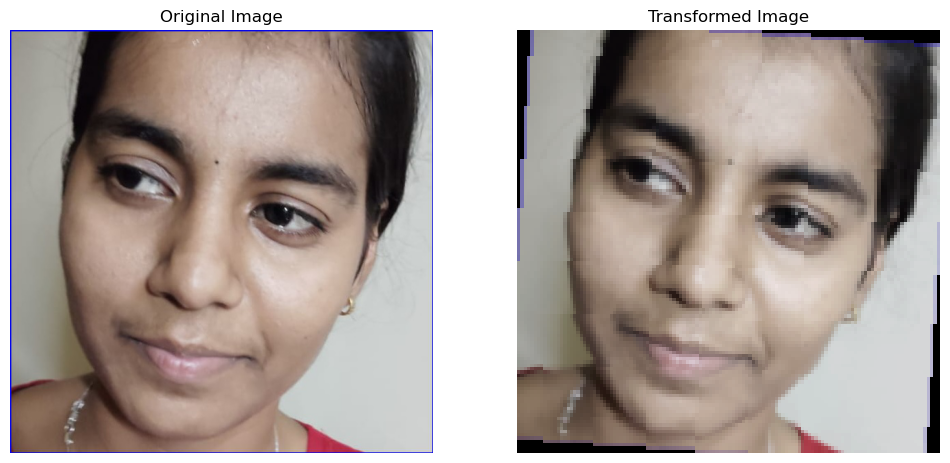

In [21]:
sample_image_path = r"C:\Users\Devi B\Desktop\dataset\Ramya\face_WhatsApp Image 2024-08-01 at 10.18.26 PM (3).jpeg"
original_image = Image.open(sample_image_path).convert('RGB')
transformed_image = load_and_transform_image(sample_image_path, transform)
plot_images(original_image, transformed_image)

In [22]:
train_dataset = CustomDataset(train_images, y_train, transform=transform)
test_dataset = CustomDataset(test_images, y_test, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


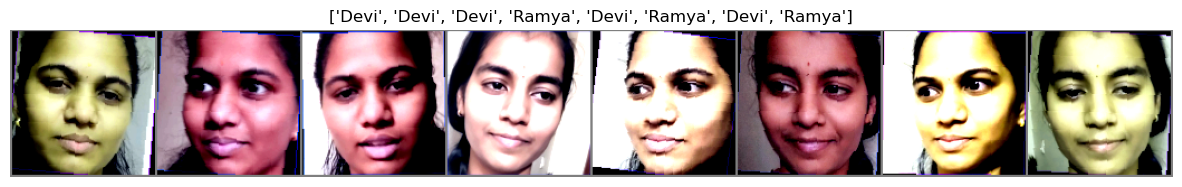

In [23]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis('off')

def plot_batch_of_images(dataloader, classes, num_images=8):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)
    out = torchvision.utils.make_grid(images[:num_images], nrow=num_images)
    plt.figure(figsize=(15, 15))
    imshow(out, title=[classes[labels[j]] for j in range(num_images)])
    plt.show()

classes = ['Ramya', 'Devi']
plot_batch_of_images(train_loader, classes)


In [24]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
num_ftrs

512

In [27]:
model.fc

Linear(in_features=512, out_features=2, bias=True)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [29]:
criterion

CrossEntropyLoss()

In [30]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [31]:
scheduler

In [32]:
n_epochs = 15
epoch_losses = []
for epoch in tqdm(range(n_epochs), desc='Epochs'):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{n_epochs}', leave=False):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)
    tqdm.write(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")


Epochs:   7%|█████                                                                      | 1/15 [00:04<01:09,  4.95s/it]

Epoch 1, Loss: 0.6648



Epochs:  13%|██████████                                                                 | 2/15 [00:09<01:01,  4.72s/it]

Epoch 2, Loss: 0.3177



Epochs:  20%|███████████████                                                            | 3/15 [00:13<00:54,  4.58s/it]

Epoch 3, Loss: 0.0874



Epochs:  27%|████████████████████                                                       | 4/15 [00:18<00:48,  4.44s/it]

Epoch 4, Loss: 0.0054



Epochs:  33%|█████████████████████████                                                  | 5/15 [00:22<00:44,  4.43s/it]

Epoch 5, Loss: 0.0255



Epochs:  40%|██████████████████████████████                                             | 6/15 [00:26<00:39,  4.39s/it]

Epoch 6, Loss: 0.0104



Epochs:  47%|███████████████████████████████████                                        | 7/15 [00:31<00:35,  4.38s/it]

Epoch 7, Loss: 0.0180



Epochs:  53%|████████████████████████████████████████                                   | 8/15 [00:35<00:30,  4.37s/it]

Epoch 8, Loss: 0.0032



Epochs:  60%|█████████████████████████████████████████████                              | 9/15 [00:39<00:26,  4.36s/it]

Epoch 9, Loss: 0.0036



Epochs:  67%|█████████████████████████████████████████████████▎                        | 10/15 [00:44<00:21,  4.36s/it]

Epoch 10, Loss: 0.0047



Epochs:  73%|██████████████████████████████████████████████████████▎                   | 11/15 [00:48<00:17,  4.35s/it]

Epoch 11, Loss: 0.0028



Epochs:  80%|███████████████████████████████████████████████████████████▏              | 12/15 [00:52<00:13,  4.35s/it]

Epoch 12, Loss: 0.0012



Epochs:  87%|████████████████████████████████████████████████████████████████▏         | 13/15 [00:57<00:08,  4.36s/it]

Epoch 13, Loss: 0.0055



Epochs:  93%|█████████████████████████████████████████████████████████████████████     | 14/15 [01:01<00:04,  4.33s/it]

Epoch 14, Loss: 0.0236



Epochs: 100%|██████████████████████████████████████████████████████████████████████████| 15/15 [01:05<00:00,  4.39s/it]

Epoch 15, Loss: 0.0121


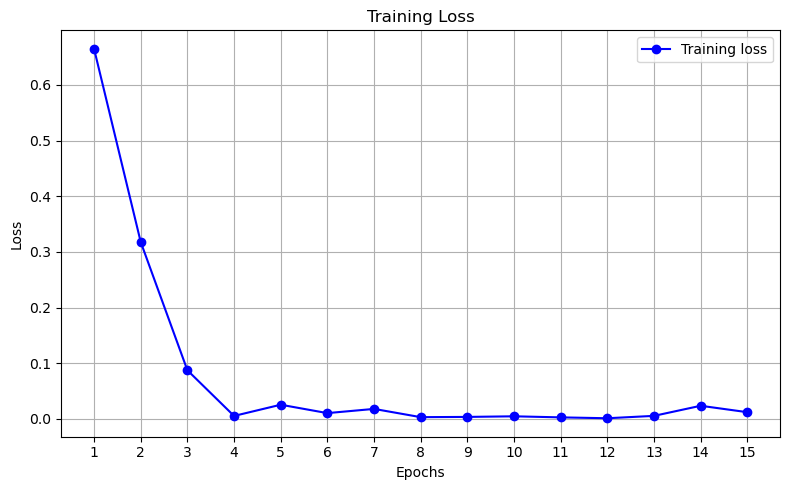

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, n_epochs + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# Save the trained model
torch.save(model.state_dict(), 'classifier.pth')


In [35]:
model.load_state_dict(torch.load('classifier.pth'))
model.eval()

C:\Users\Devi B\AppData\Local\Temp\ipykernel_3944\74539321.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('classifier.pth'))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [37]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        temp, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 100.00%


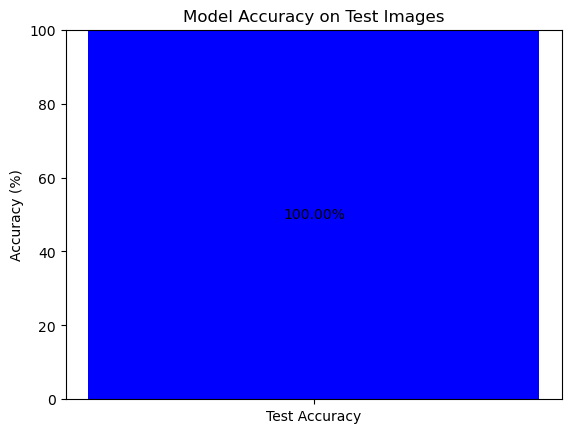

In [38]:
def plot_test_accuracy(accuracy):
    fig, ax = plt.subplots()
    ax.bar(['Test Accuracy'], [accuracy], color='blue')
    ax.set_ylim([0, 100])
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Model Accuracy on Test Images')
    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f%%', label_type='center')
    plt.show()

# Call the plot function
plot_test_accuracy(accuracy)


In [39]:
import matplotlib.pyplot as plt

The predicted class for the image is: Ramya


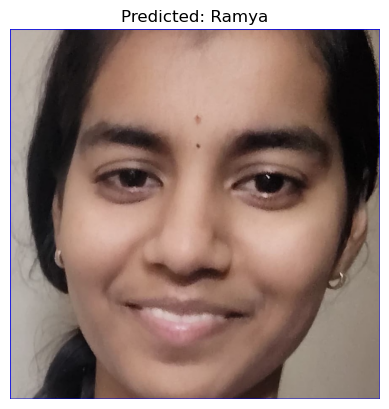

In [40]:
# Define the transformation to match the training data preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def load_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

def predict_image(model, image_path):
    image = load_image(image_path)
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return "Ramya" if predicted.item() == 0 else "Devi"

def plot_image(image_path, prediction):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = r"C:\Users\Devi B\Desktop\dataset\Ramya\face_WhatsApp Image 2024-08-07 at 9.57.53 PM.jpeg"
prediction = predict_image(model, image_path)
print(f'The predicted class for the image is: {prediction}')
plot_image(image_path, prediction)